In [1]:
import sqlite3

# Connect to SQLite (will create if doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sales_data = [
    ("Bottle", 10, 200),
    ("Lunch Box", 5, 300),
    ("Bottle", 15, 200),
    ("Lunch Box", 10, 300),
    ("Tiffin", 7, 250)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

conn.commit()
conn.close()


Sales Summary:
      product  total_qty  revenue
0     Bottle         25   5000.0
1  Lunch Box         15   4500.0
2     Tiffin          7   1750.0


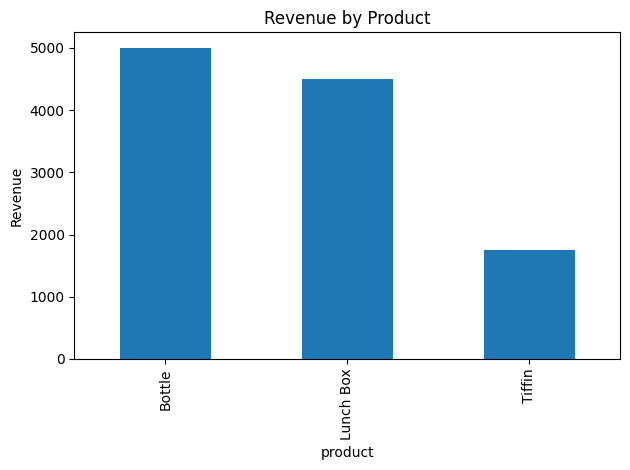

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
conn = sqlite3.connect("sales_data.db")

# SQL Query
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

# Read results into a DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Print results
print("Sales Summary:\n", df)

# Plot a bar chart
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional: Save chart
plt.show()
